In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement=Base.classes.measurement
station= Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session (engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

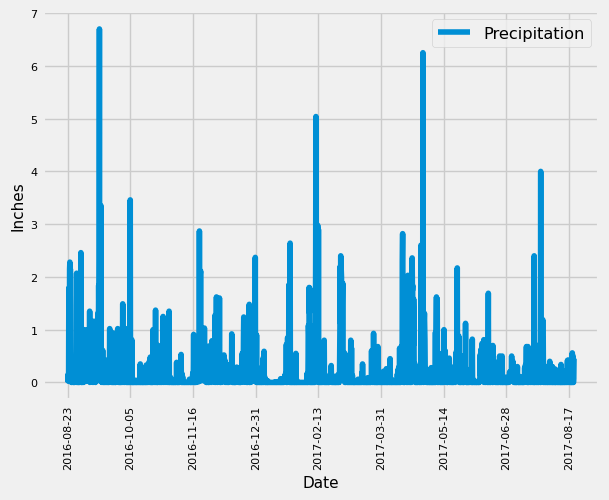

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_12_months=dt.date(2017,8,23)-dt.timedelta(days=365)
# Calculate the date one year from the last date in data set.
previous_year=dt.date(last_12_months.year, last_12_months.month, last_12_months.day)

# Perform a query to retrieve the data and precipitation scores
query= session.query(measurement.date, measurement.prcp).filter(measurement.date>=previous_year).order_by (measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df= pd.DataFrame(query,columns=["date", "prcp"])

# Sort the dataframe by date
results_df.set_index("date", inplace=True)

results_df_dNA= results_df.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
results_df_dNA.plot()
plt.xlabel("Date", size=11)
plt.ylabel("Inches", size=11)
plt.legend(["Precipitation"], loc="upper right", fontsize='small')
plt.xticks(rotation=90, size=8)
plt.yticks(size=8)
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df_dNA.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
#inspect the station columns
inspector= inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('station')
#columns

In [ ]:
#inspect the measurements columns
columns = inspector.get_columns('measurement')
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [ ]:
# Design a query to calculate the total number of stations in the dataset
total_station=session.query(station.id).count()
total_station

9

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_station = (
    session.query(measurement.station, func.count())
    .group_by(measurement.station)
    .order_by(func.count().desc())
    .all()
)
most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

which station id has the greatest number of observations?
USC00519281 has the most active stations

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps_min= session.query(func.min(measurement.tobs)).filter(measurement.station=='USC00519281').all()
temps_highest= session.query(func.max(measurement.tobs)).filter(measurement.station=='USC00519281').all()
temps_avg= session.query(func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()
print(temps_min, temps_highest, temps_avg)

[(54.0,)] [(85.0,)] [(71.66378066378067,)]


In [ ]:
temps_results = (
    session.query(measurement.date)
    .filter(measurement.station == 'USC00519281')
    .order_by(measurement.date.desc())
    .first()
)
temps_results
date=dt.date(2017,8,18)-dt.timedelta(days=365)

date

datetime.date(2016, 8, 18)

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Starting from the most recent data point in the database. 
# Find the most recent date in the data set.
temps_results = session.query( measurement.tobs).\
                filter(measurement.station =='USC00519281').\
                filter(measurement.date >='2016-08-23').all()
#temps_results

In [ ]:
#turn the data in the data into a data frame for ploting
temps_results_df=pd.DataFrame(temps_results,columns=['tobs'])

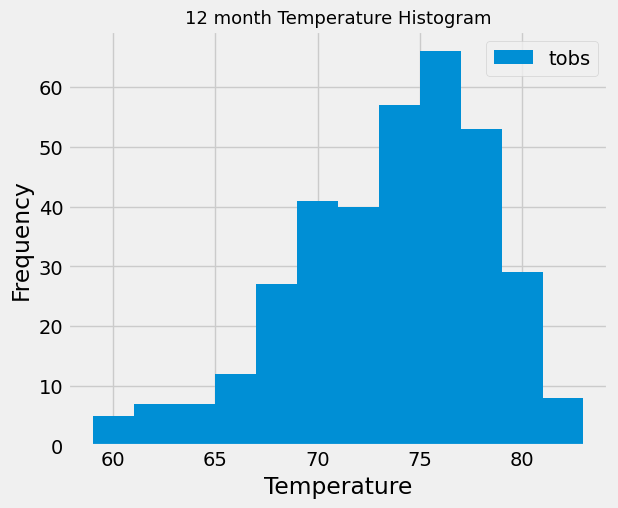

In [ ]:
#plot the histogram
temps_results_df.plot.hist(bins=12)
plt.tight_layout()
plt.title("12 month Temperature Histogram", size=13)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()

# Close Session

In [ ]:
# Close Session
session.close()